# Optimisez la gestion des données d'une boutique avec R ou Python

# Analyse du besoin

## Société : 
    Boutique BottleNeck, un marchand de vin très prestigieux
    
## Contexte du projet:
    BottleNeck dispose un outil ERP pour gérer le prix et le stock des produits et un outil WEB(CMS) pour gérer la vente en ligne.
    ERP: Référence produit,Prix,Stock
    WEB(CMS): sku, Nom de Produit, Description de Produit, Nombre de Vente,

## Problèmes rencontrés par la société: 
    La disconnection de système ERP et WEB(CMS) pose les problèmes ci-dessous:
    -la gestion des stocks est complexe
    -la visibilité en termes d’analyse des ventes sur le net est réduite,
    -L'export de WEB(CMS) ne permets pas de suivre l'évolution de vente dans le temps
    
## Missions:
    1.Un rapprochement de 2 outils ERP et WEB (CMS) (un tableau excel 'liaison' disponible pour lier produit_id de ERP et sku de WEB(CMS))
    2.le chiffre d’affaires par produit
    3.le total du chiffre d’affaires réalisé en ligne
    4.détecter les valeurs aberrantes dans le prix des produit, les lister  et les présenter en graphique
    5.approfondir l'analyse de la situation de stock et de vente
    
## Outil:
    -ERP: Excel erp.xlsx
    -WEB: Excel web.xlsx (extraction des données CMS)
    -Tableau de liaison: liaison.xlsx (produit_id: exhaustive , sku(id_web): à vérifier)

In [1]:
#importer les outils python
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Eviter l'affichage des messages erreurs
import warnings
warnings.filterwarnings('ignore')

#affichier les colonnes et lignes complet de dataframe
pd.options.display.max_rows= None
pd.options.display.max_columns= None

# Mission 1 Rapprochement de ERP et WEB (CMS)


## 1.Vérifier et Nettoyer le tableau 'web'(CMS)

### 1.1 Importer et Visualiser les données de tableau web

Dimension: 1513 lignes X 30 colonnes

Clés Primaire: sku



In [2]:
# lire les données de CMS (fichier excel 'web.xlsx'), Nommer WEB comme dataframe pour stocker les donner de CMS(WEB)
WEB=pd.read_excel('C:/Users/PF/Desktop/openclassroom/P5/web.xlsx')

print('Dimension de tableau WEB', WEB.shape)

# Affichier 2 premier lignes pour voir le structure des données CMS
display(WEB.head(2))

Dimension de tableau WEB (1513, 28)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",publish,closed,closed,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,NaN,publish,closed,closed,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


### 1.2 Visualiser le structure des données de tableau web 
Données total: 1513 lignes

Données avec sku: 1428 lignes

Sku vide à vérifier: 85 lignes

In [3]:
# Vérifier les columns des données CMS, les valeurs manquantes, et les types
WEB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [4]:
#Sélectionner les lignes avec sku vide en vérifiant l'état des colonnes associées de ces lignes.
WEB[WEB['sku'].isna()==True].isna().sum()

sku                      85
virtual                   0
downloadable              0
rating_count              0
average_rating           83
total_sales              83
tax_status               83
tax_class                85
post_author              83
post_date                83
post_date_gmt            83
post_content             85
post_title               83
post_excerpt             83
post_status              83
comment_status           83
ping_status              83
post_password            85
post_name                83
post_modified            83
post_modified_gmt        83
post_content_filtered    85
post_parent              83
guid                     83
menu_order               83
post_type                83
post_mime_type           85
comment_count            83
dtype: int64

### 1.3 Visualiser et Traitement des cases vides de tableau web

    83 lignes complétement vides

    2 lignes avec les informations partiels


#### Stocker les 2 lignes avec informations partiel dans une dataframe 'infoWEBverifier' pour demander à la société de les vérifier:

Dans les données sans sku, 2 lignes avec informations partiel: (index 1450 et 1451, ont seulement les dates de post et 2 liens url qui contiennent l'information de produit_id p=5070 et p=5075)

#### Tous les lignes sans sku ne seron pas utilisable dans la rapprochement de ERP et WEB, on va garder seulement les lignes avec l'information de sku dans le tableau web


In [5]:




#Affichier les lignes sans sku (on trouve 2 lignes avec l'informations dans quelques colonnes, les autres sont complétement vide)
display(WEB[WEB['sku'].isna()==True])


#Vérifier le contenu de colonne guid dans les données sans sku
print(WEB[WEB['sku'].isna()==True].guid.unique())


#Stocker 2 lignes avec information partial pour vérifier après avec l'entreprise
infoWEBverifier=WEB[(WEB['sku'].isna()==True)&(WEB['guid'].isna()==False)]
display(infoWEBverifier)





,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1428,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1434,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1435,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[nan 'https://www.bottle-neck.fr/?post_type=product&#038;p=5070'
 'https://www.bottle-neck.fr/?post_type=product&#038;p=5075']


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1450,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1451,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,NaN,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### 1.4 Garder seulement les 1428 lignes de données avec l'information sku dans le tableau WEB

In [6]:
#Nettoyage des données vides de tableau WEB
WEB=WEB[WEB['sku'].isna()==False]

#Vérifier les données WEB après le nettoyage
WEB.info()

#Résultat indique les données sont alignées avec les informations des sku

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object        
 13  pos

### 1.5 Vérifier les doublons dans le tabeau WEB

sku unique dans WEB : 714 informations

Le tableau WEB : 1428 lignes de informations

Donc il existe les sku en doublons à vérifier

In [7]:
print('le nombre de sku unique est :',len(WEB.sku.unique()))

le nombre de sku unique est : 714


### 1.6 Traitement des doublons de tableau WEB

#### Affichier les 6 premiers lignes pour voir la situation des sku en doublons. 
    
    On trouve que chaque sku a 2 lignes dont 1 ligne avec post_type 'product' qui est taxable, et un autre ligne avec post_type 'attachment' qui est non taxable. 
    
    On comprend que la ligne en post_type 'attachement' est une explication complémentaire de ligne post_type 'product'. Nous devons supprimer les lignes en post_type 'attachement' dans le tableau WEB. Exemple sku 38, 41  et 304 affichis en 6 premières lignes.

    Après la nettoyage des sku doublons, on trouve bien 714 lignes dans tableau WEB. C'est à dire que tous les doublons s'agit de post_type 'attachement'. Il n'y a plus des doublons après la nettoyage.
    
    
#### Concerver seulement les données avec post_type = 'product' dans le tableau WEB

In [8]:
WEB.head(6)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",publish,closed,closed,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,NaN,publish,closed,closed,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,NaN,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,NaN,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,41,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,NaN,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,NaN,publish,closed,closed,NaN,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,NaN,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",publish,closed,closed,NaN,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,304,0,0,0,0.0,40.0,NaN,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,NaN,Champagne Gosset Grande Réserve,NaN,publish,closed,closed,NaN,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [9]:
#maintenir seulement les lignes avec post_type = 'product' dans tableau WEB
WEB=WEB[WEB['post_type']=='product']

#Vérifier l'info de WEB après le nettoyage des lignes doublons
print('Le nombre de sku unique dans WEB après le nettoyage des doublons:',len(WEB.sku.unique()))

display(WEB.info())

Le nombre de sku unique dans WEB après le nettoyage des doublons: 714
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 1426
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64      

None

## 2.Vérifier et Nettoyer le tableau liaison (product_id/id_web)

### 2.1 Visualiser et Etudier les données de tableau 'liaison'

Dimension tableau liaison: 825 lignes x 2 colonnes

Clés Primaire de tableau liaison : product_id

Colonne qui permet de faire la liaison avec tableau WEB: id_web (=sku selon émail Sylvie)

In [10]:
# Nommer dataframe LS pour stocker les données de liaison.xlsx
LS=pd.read_excel('C:/Users/PF/Desktop/openclassroom/P5/liaison.xlsx')

# Affichier la dimension de tableau liaison
print('La dimension de tableau liaison est :',LS.shape)

# Affichier les premières lignes de tableau liaison pour vérifier la situation
LS.head()

La dimension de tableau liaison est : (825, 2)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


### 2.2 Vérifier le structure des données de tableau liaison

#### Cases vides:
    Avec le méthode info(), on trouve également il existe 825 lignes avec product_id mais seulement 734 lignes avec l'information de sku (id_web), donc 91 cases vide dans colonne 'id_web'.
    
    Comme nous appliquerons le jointure gauche dans tableau WEB pour récupérer les product_id de tableau liaison, ces informations manquantes ne nous poserent pas de problème de jointure pour l'instant.

In [11]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [12]:
LS.isna().sum()

product_id     0
id_web        91
dtype: int64

### 2.2 Vérifier les doublons de tableau liaison

#### Il n'y a pas des informations en doublons dans le tableau liaison.

    Le nombre de valeurs uniques de product_id et id_web sont identique que l'information retourné par LS.info(). Donc il n'existe pas des product_id ou id_web en doublons.
    (Le nombre de valeur unique de id_web = 735 (734 id_web + 'nan'))

    Il signifie aussi que chaque product_id a un seul id_web(sku) dans le tableau liaison.
    
    Par contre 734 id_web dans tableau liaison contre 714 sku dans tableau WEB montrent qu'il existe une incohérences des sku entre les 2 tableaux. Nous devons vérifier avant de merger les 2 tableaux.

In [13]:
print('Le nombre de product_id unique dans tableau liaison est :',len(LS['product_id'].unique()))
print('Le nombre de sku unique dans tableau liaison est :',len(LS['id_web'].unique()))

Le nombre de product_id unique dans tableau liaison est : 825
Le nombre de sku unique dans tableau liaison est : 735


### 2.3 Vérifier si tous les sku de tableau WEB sont connu de tableau liaison

#### Tous les sku de tableau WEB sont connu de tableau liaison, donc on pourra appliquer le merge gauche entre WEB et Liaison.
#### Donc,tous les sku de tableau WEB vont pouvoir récupérer le product_id connu de tableau liaison.

Selon la comparaison entre sku de tableau WEB et id_web de tableau liaison(LS), nous avons identifié:
    
    -20 id_web de tableau liaison sont inconnus de tableau WEB
    
    -tous les sku de tableau WEB sont connus de tableau liaison
    
    Comme nous récupère l'information de product_id de tableau liaison en remplissant le tableau WEB, les 21 id_web(sku) supplémentaires de tableau liaison ne posera pas de problème pour le processus suivant.

In [14]:
#Stocker sku de WEB dans un liste sku
sku=WEB.sku.unique().tolist()

#Stocker sku de tableau liaison dans un liste idWEB
idWEB=LS['id_web'].unique().tolist()

#Stocker dans 'SkuAbsentCMS' les sku connu de LS mais pas connu de CMS
SkuAbsentCMS=set(idWEB)-set(sku)

#Stocker dans 'SkuAbsentLS' les sku connu de CMS mais pas connu de lS
SkuAbsentLS=set(sku)-set(idWEB)
print('sku connu de LS mais pas dans CMS:\n',len(SkuAbsentCMS))
print('sku connu de LS mais pas dans CMS:\n',SkuAbsentCMS)
print('nombre de sku connu de WEB mais pas dans LS:\n',len(SkuAbsentLS))
print('sku connu de WEB mais pas dans LS:\n',SkuAbsentLS)

# On trouve 21 sku de tableau liaison ne sont pas présent dans CMS
# Mais comme tous les sku de CMS présent dans le tableau de liaison, nous pouvons appliquer une joindure se base sur CMS

sku connu de LS mais pas dans CMS:
 21
sku connu de LS mais pas dans CMS:
 {nan, 13577, 14730, 15630, 14360, 15272, 14377, 15529, 14379, 15154, 14648, 12601, 14785, 13771, 15065, 14689, 15586, '14680-1', 15608, 15609, 14715}
nombre de sku connu de WEB mais pas dans LS:
 0
sku connu de WEB mais pas dans LS:
 set()


## 3 Joindre le tableau liaison (liaison.xlsx) au tableau web(CMS) pour récupérer le product_id de tableau liaison

In [15]:
#Merger le tableau WEB et tableau LS(liaison) avec le jointure gauche en utilisant l'identifiant de tableau web 'sku' et l'identifiant de tableau LS(liaison) 'id_web'
WEB=pd.merge(WEB,LS,how='left',left_on='sku',right_on='id_web')

#supprimer 'id_web' (doublons avec la colonne sku) dans tableau WEB après le merge
del WEB['id_web']

#Renomer la colonne product_id en 'product_id_LS'
WEB.rename(columns={'product_id':'product_id_LS'}, inplace=True)
display(WEB.head(2))

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id_LS
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",publish,closed,closed,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4729
1,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,NaN,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,NaN,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4634


## 4. Vérifier la fiabilité des informations de tableau liaison via la colonne URL (guid) de CMS (comparer product_id dans URL de CMS et product_id de tableau liaison)


    Sylvie sigale une inquétude sur les données de sku(id_wed) de tableau liaison. Comme nous avons trouvé l'information de product_id dans le URL(guid) de tableau CMS, nous pouvons vérifier la cohérence entre product_id de colonne guid et product_id de tableau liaison. Si ils sont cohérents, donc les sku de tableau liaison sont corrects.


#### Durant l'analyse des données WEB, nous trouvons que la colonne 'guid' de tableau WEB compose de product_id dans URL.
#### Nous utilisons cette information pour recontrôler la fiabilité des informations de tableau liaison.

    

### 4.1 Vérifier les informations de colonne 'guid' dans le tableau WEB

#### Colonne 'guid' n'ont pas de valeur 'nan'

#### Montrer les examples des informations de colonne 'guid'
   Dans la colonne 'guid', url se termine par un chiffre (example p=4729 dont 4729). Ce chiffre est bien le product_id qu'on cherche. On pourra vérifier la fiabilité des informations de tableau LS avec ce chiffre. (Exemple 'https://www.bottle-neck.fr/?post_type=product&#038;p=4729', 4729 est bien 'product_id' qu'on cherche.)
   
   Si ce chiffre est identique que le product_id que nous avons récupère de tableau LS(liaison), il signifie que l'information de tableau LS(liaison) est robuste.
 

In [16]:
#Vérifier s'il y a les valeurs nan dans colonne guid
print('Le nombre de vide dans la colonne guid de tableau WEB est:',WEB.guid.isna().sum())

# Vérifier le nombre de valeur unique de colonne guid, il y a bien 714 valeurs uniques qui est cohérent avec le nombre de sku unique
print('Le nombre de URL est:',len(WEB.guid.unique()))

# Affichier les 5 premières valeurs uniques de colonne guid
WEB.guid.unique()[0:5]

Le nombre de vide dans la colonne guid de tableau WEB est: 0
Le nombre de URL est: 714


array(['https://www.bottle-neck.fr/?post_type=product&#038;p=4729',
       'https://www.bottle-neck.fr/?post_type=product&#038;p=4634',
       'https://www.bottle-neck.fr/?post_type=product&#038;p=4141',
       'https://www.bottle-neck.fr/?post_type=product&#038;p=5932',
       'https://www.bottle-neck.fr/?post_type=product&#038;p=5047'],
      dtype=object)

### 4.2 Stocker les product_id identifié dans URL dans une nouvelle colonne 'idINurl' de tableau WEB

In [17]:
#Créer une nouvelle colonne 'idINurl' pour stocker le product_id ou le nom de produit d'origine URL

WEB['idINurl']=0

#Créer un boucle pour extraire les produit_id dans colonne guid

for i in range(len(WEB.guid)):
        WEB['idINurl'][i]=WEB.guid[i].split(';')[1]
        WEB['idINurl'][i]=WEB['idINurl'][i].split('=')[1]

WEB.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id_LS,idINurl
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",publish,closed,closed,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4729,4729
1,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,NaN,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,NaN,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4634,4634


### 4.3 Vérifier les product_id trouvés de colonne 'guid' en comparant avec product_id récupéré de tableau liaison

#### Tous les lignes des données de tableau WEB ont trouvé un product_id via la colonne 'guid', et que ces product_id sont cohérents avec les product_id récupérés de tableau liaison. On conclut que les informations de tableau liaison sont fiables.

#### le nombre de product_id non trouvé dans URL est: 0
    Tous les lignes ont trouvé un information dans la colonne 'guid'
    
#### le nombre de product_id unique trouvé dans guid est: 714
#### le nombre de product_id unique récupéré de tableau LS(liaison) est: 714
    
    Ces 2 informations sont cohérentes avec le nombre de sku dans WEB, donc il n'existe pas de doublons dans les 2 cas.
    
#### Le nombre de sku avec product_id_LS!=idINurl est : 0
   
    Pour chaque ligne, le product_id_LS et le idINurl dans le tableau WEB sont identique, donc on pourra conclure que l'information qu'on a récupéré de tableau LS(liaison) est correcte.

In [18]:


print('le nombre de product_id non trouvé dans URL est:',WEB[WEB['idINurl']==0].idINurl.count())
print('le nombre de product_id unique trouvé dans guid est:',len(WEB['idINurl'].unique()))
print('le nombre de product_id unique récupéré de tableau LS(liaison) est:',len(WEB['product_id_LS'].unique()))

# on vérifie si product_id_LS est cohérent avec idINurl
WEB['idINurl']=WEB['idINurl'].astype(int)
print('Le nombre de sku avec product_id_LS!=idINurl est :\n',WEB[WEB['product_id_LS']!=WEB['idINurl']]['sku'].count())


le nombre de product_id non trouvé dans URL est: 0
le nombre de product_id unique trouvé dans guid est: 714
le nombre de product_id unique récupéré de tableau LS(liaison) est: 714
Le nombre de sku avec product_id_LS!=idINurl est :
 0


### 4.3 Mettre en forme le tableau WEB(CMS)

In [19]:
# On garde une colonne product_id dans les données CMS(WEB)
del WEB['idINurl']

#On renomme la colonne product_id pour merger avec les données ERP
WEB.rename(columns={'product_id_LS':'product_id'}, inplace=True)
display(WEB.head(2))

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,NaN,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",publish,closed,closed,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4729
1,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,NaN,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,NaN,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4634


## 5.Calculer le nombre de vente par sku dans tableau WEB (CMS)

     Avant de rapprochement de WEB vers le tableau ERP, pour calculer le chiffre d'affaire par produit, nous devons d'abord calculer le nombre de vente dans le tableau WEB par produit.

### 5.1 Créer une dataframe WEBsku pour calculer le nombre de vente par sku. 
### Ce tableau va joindre le ERP avec le nombre de vente calculé pour calculer le chiffre d'affaire après la nettoyage de tableau ERP.
    
#### Analyser le nombre de vente par produit:
    Dans les 714 sku, seulement 385 sku ont réalisé les ventes contre 329 sku avec 0 vente. 
    
    Les 2 sku les meilleurs vendus sont  7818 (product_id 4334) 96 bouteilles vendues et 1662(product_id 4144) 87 bouteilles vendues.
    
    Les  sku les moins vendus (dans les sku avec une vente) sont avec unité de vente 1 ex:  12315 (product_id 6665), et 16068 (product_id 5398)
    
    

In [20]:

#Créer une dataframe 'WEBsku' pour stock le nombre de vente par 'sku' selon le tableau WEB
WEBsku=WEB.groupby(['sku','post_name','product_id'],as_index=False).agg({'total_sales':sum}).sort_values(by=['total_sales'],ascending=False)

# On vérifie le nombre de sku qui génere les ventes et sans ventes
NombreSKUavecVente=WEBsku[WEBsku['total_sales']!=0].sku.count()
NombreSKUsansVente=WEBsku[WEBsku['total_sales']==0].sku.count()
print('Nombre de SKU avec Vente:\n', NombreSKUavecVente)
print('Nombre de SKU sans Vente:\n',NombreSKUsansVente)

#Affichier les top10 sku selon le nombre de vente généré
MeilleurVenteTop10=WEBsku.head(10)
print('le top 10 sku les plus vendus en nombre de vente:')
display(MeilleurVenteTop10)

#Affichier les 10 sku le moins vendus selon le nombre de vente généré (dans les sku avec une vente)
MoinsVenteTop10=WEBsku[WEBsku['total_sales']!=0].sort_values('total_sales',ascending=False).tail(10)
print('le 10 sku les moins vendus en nombre de vente:')
display(MoinsVenteTop10)


Nombre de SKU avec Vente:
 385
Nombre de SKU sans Vente:
 329
le top 10 sku les plus vendus en nombre de vente:


,sku,post_name,product_id,total_sales
32,7818,champagne-gosset-grand-blanc-de-blanc,4334,96.0
16,1662,champagne-gosset-grand-rose,4144,87.0
680,16416,gilles-robin-crozes-hermitage-papillon-2019,4068,62.0
663,16295,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,4200,46.0
634,16210,maurel-pays-oc-chardonnay-2019,4172,43.0
629,16189,le-pas-de-lescalette-languedoc-petits-pas-2019,4187,42.0
703,16580,domaine-giudicelli-patrimonio-blanc-2019,6206,41.0
2,304,gosset-champagne-grande-reserve,4141,40.0
0,38,emile-boeckel-cremant-brut-blanc-de-blancs,4729,38.0
650,16264,chateau-de-la-liquiere-faugeres-ampoule-2019,6047,38.0


le 10 sku les moins vendus en nombre de vente:


,sku,post_name,product_id,total_sales
62,11933,maison-trimbach-riesling-cfe-2008,5819,1.0
406,15567,domaine-de-la-tour-du-bandol-en-sol-2017,4300,1.0
480,15763,domaine-de-la-monardiere-vacqueyras-les-vieill...,6635,1.0
533,15880,francois-baur-pinot-gris-herrenweg-de-turckhei...,4722,1.0
355,15378,paul-ginglinger-pinot-noir-les-rocailles-2016,4098,1.0
553,15949,domaine-de-lidylle-savoie-roussette-2018,4306,1.0
70,12365,pares-balta-penedes-electio-2013,5630,1.0
551,15945,domaine-weinbach-riesling-schlossberg-catherin...,5611,1.0
68,12315,chili-montsecano-ostertag-pinot-noir-2013,5398,1.0
593,16068,domaine-hauvette-igp-alpilles-jaspe-2017,6665,1.0


### 5.2 Visualiser le nombre de sku avec vente et sans vente et Affichier les top 30 sku le plus vendus en nombre de vente dans un graphique.

Text(0.5, 1.0, 'Top 30 SKU en Nombre de Vente')

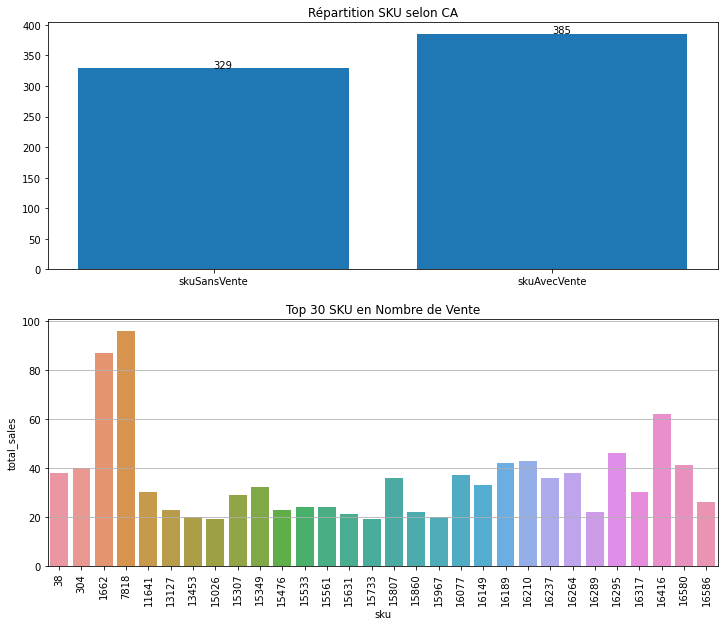

In [21]:
plt.figure(figsize=(12,10))

#Visualiser le nombre de sku avec une vente et sans vente
plt.subplot(211)
plt.bar(['skuSansVente','skuAvecVente'],[NombreSKUsansVente,NombreSKUavecVente])
plt.title('Répartition SKU selon CA')
plt.text('skuSansVente',330,329)
plt.text('skuAvecVente',386,385)
# Visualiser les top30 sku le plus vendus selon Nombre de Vente généré
plt.subplot(212)
sns.barplot(data=WEBsku.head(30).sort_values(by=['total_sales'],ascending=False),x='sku',y='total_sales')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Top 30 SKU en Nombre de Vente')

## 6.Vérifier et Nettoyer le tableau ERP

### 6.1 Intégrer et Visualiser les données de tableau ERP

#### Dimension de tableau ERP : 825 lignes X 5 colonnes

#### Clés Primaire de tableau ERP : product_id  (qui est connu de tableau WEB et  permet de joindre le tableau ERP et WEB)

    Colonne 'price' permet de calculer le chiffre d'affaire

    Colonne de 'onsale_web', 'stock_status' et 'stock_quantity' permet de vérifier la cohérence de statu des produits entre ERP et WEB

    Colonne 'stock_quantity' permet d'éffectuer une analyse plus profond


In [22]:
#Stocker les données erp dans une dataframe nommé ERP
ERP=pd.read_excel('C:/Users/PF/Desktop/openclassroom/P5/erp.xlsx')
print('La dimension de tableau ERP est:',ERP.shape)
ERP.head()

La dimension de tableau ERP est: (825, 5)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


### 6.2 Vérifier les valeurs vides et les doublons de tableau ERP 

#### Sans valeurs vides:
    Il n'y a pas de valeur vide, tous les colonnes avec 825 données selon ERP.info(). 
    
#### Sans doublons dans product_id:    
    Nombre de valeur unique de product_id dans ERP est 825 qui est identique que l'information retourné par ERP.info(), donc il n'y a pas de product_id en doublons dans ERP.
   
    ERP pourra récupérer les informations de tableau WEBsku avec le clés product_id en applicant la jointure gauche.

In [23]:
#Vérifier les données de ERP

display(ERP.info())
# il n'y a pas des valeurs manquantes dans ERP
#Vérifier s'il y a les doublons en product_id

print('Nombre de valeur unique de product_id dans ERP:\n',len(ERP.product_id.unique()))
#825 product_id dans ERP qui est cohérent avec ERP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


None

Nombre de valeur unique de product_id dans ERP:
 825


## 7. EPR récupère l'information de sku et nombre de vente par sku de tableau WEBsku

In [24]:

ERP=pd.merge(ERP, WEBsku,how='left',on='product_id')
ERP.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales
0,3847,1,24.2,0,outofstock,15298,pierre-jean-villa-saint-joseph-preface-2018,6.0
1,3849,1,34.3,0,outofstock,15296,pierre-jean-villa-saint-joseph-tilde-2017,0.0


### 7.1 Analyser les données de tableau ERP après le jointure gauche avec le tableau WEB

#### 111 product_id n'ont pas trouvé les informations de sku via le tableau WEB
    Selon ERP.info() après la jointure, on trouve bien qu'il y a 825 product_id connus mais seulement 714 product_id avec un numéro sku officialisé. 

#### 111 product_id sans information sku sont potentiellement les nouveaux produits qui sont en cours de l'officialisation pour la vente.    


In [25]:
ERP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   sku             714 non-null    object 
 6   post_name       714 non-null    object 
 7   total_sales     714 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 58.0+ KB


### 7.2 Analyser les situations de product_id par classement 'statu sku','stock_status','onsale_web'

#### 'statu sku'
    Une nouvelle colonne que nous allons ajouter pour étiquetter les product_id selon  avec ou sans les informations de sku disponible

    Comme la société a du mal de gérer le stock entre CMS et ERP, et que dans le nouveau tableau ERP, il disponible les informations comme 'onsale_web' et 'stock_status', nous pouvons utiliser ces informations pour vérifier s'il y a les écartes ou les erreurs historiques à cause de manque de liaison entre les 2 systèmes.

#### On crée une nouvelle colonne 'statu sku' dans ERP pour différentier les sku connus et inconnus.

In [26]:
# ajouter l'étiquette 'sku inconnu' dans colonne 'statu sku' pour les lignes sans information de sku
ERP.loc[(ERP.sku.isna()==True),'statu sku']='sku inconnu'

# ajouter l'étiquette 'sku connu' dans colonne 'statu sku' pour les lignes avec information de sku
ERP.loc[(ERP.sku.isna()==False),'statu sku']='sku connu'

ERP.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku
0,3847,1,24.2,0,outofstock,15298,pierre-jean-villa-saint-joseph-preface-2018,6.0,sku connu
1,3849,1,34.3,0,outofstock,15296,pierre-jean-villa-saint-joseph-tilde-2017,0.0,sku connu
2,3850,1,20.8,0,outofstock,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0,sku connu
3,4032,1,14.1,0,outofstock,19814,pierre-jean-villa-igp-gamine-2018,3.0,sku connu
4,4039,1,46.0,0,outofstock,19815,pierre-jean-villa-cote-rotie-carmina-2017,0.0,sku connu


#### Classer les product_id par 'statu sku','stock_status','onsale_web' dans une nouvelle dataframe pour identifier les anomalies et visualiser les résultats dans les graphiques.

#### Résultat trouvé via l'analyse par classement:

#### 111 Sku Inconnus:

    64 product_id en stock, mais pas en statu vente. L'entreprise doit attribuer les sku et les mettre en vente

    3 product_id hors de stock, mais en statu vente. Il doit être un erreur de paramétrage qui doit être corrigé.

    44 product_id out of stock doivent être les nouveaux produits à venir
    
#### 714 Sku connus:

    140 product_id out of stock, mais en état onsale_web 1. La société doivent les réapprovisionner. Mais avant d'avoir le stock, il doit les retirer de sku en vente.

    574 product_id in stock, et en état onsale_web 1. Ce sont les sku en vente. On va voir plus tard comment optimiser le stock de cette partie.


,statu sku,stock_status,onsale_web,product_id
0,sku connu,instock,1,574
1,sku connu,outofstock,1,140
2,sku inconnu,instock,0,64
3,sku inconnu,outofstock,0,44
4,sku inconnu,outofstock,1,3


Text(0.5, 1.0, 'sku inconnu: stock_status + onsale_web VS product_id')

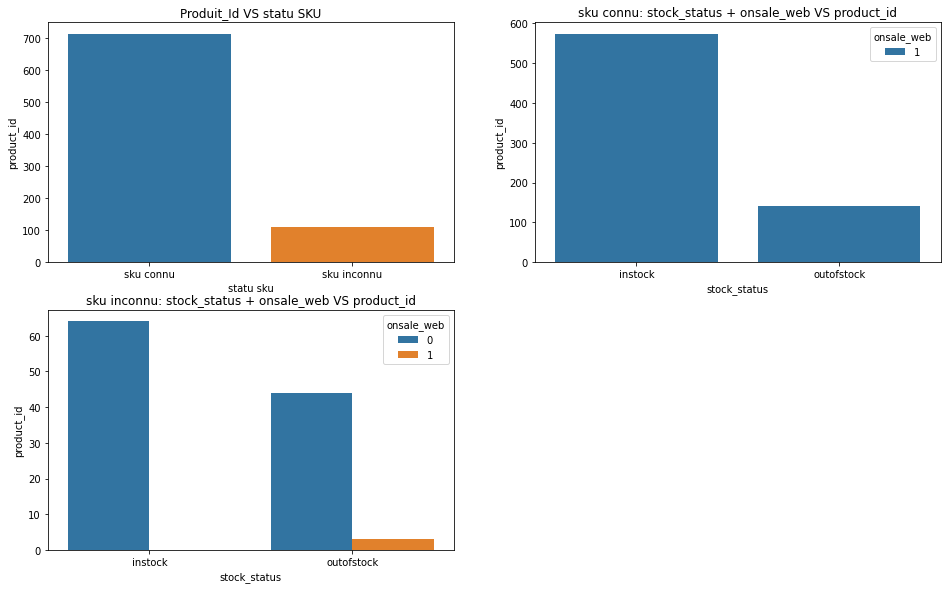

In [27]:
#Calculer le nombre de product_id par classement combiné 'statu sku','stock_status','onsale_web'
Product_Id_Statu=ERP.groupby(['statu sku','stock_status','onsale_web'],as_index=False)['product_id'].count()
display(Product_Id_Statu)

#Calculer le nombre de product_id par 'statu sku'
Product_Id_StatuSKU=ERP.groupby(['statu sku'],as_index=False)['product_id'].count()


plt.figure(figsize=(16,15))

#visualiser les product_id par classe de statu des sku 
plt.subplot(321)
sns.barplot(data=Product_Id_StatuSKU,x='statu sku',y='product_id',ci=None)
plt.title('Produit_Id VS statu SKU')

#visualiser les product_id avec SKU par classe de statu des stock et vente
plt.subplot(322)
sns.barplot(data=Product_Id_Statu[Product_Id_Statu['statu sku']=='sku connu'],x='stock_status',y='product_id',hue='onsale_web')
plt.title('sku connu: stock_status + onsale_web VS product_id')

#visualiser les product_id sans SKU par classe de statu des stock et vente
plt.subplot(323)
sns.barplot(data=Product_Id_Statu[Product_Id_Statu['statu sku']=='sku inconnu'],x='stock_status',y='product_id',hue='onsale_web')
plt.title('sku inconnu: stock_status + onsale_web VS product_id')

# Mission 2 : le chiffre d’affaires par produit

    Durant la Mission 1, on a réussit le rapprochement entre le tableau WEB(CMS) et le tableau ERP. On va se basser sur ERP pour calculer le chiffre d'affaire par produit (product_id).

## 1. Remplacer le nombre vente de 111 product_id sans sku par valeur 0 dans le tableau ERP


    Avant de calculer le chiffre d'affaire (prix x nombre de vente), nous devons traiter les 111 produit_id qui n'ont pas de sku officialisé d'où le nombre de vente est actuellement 'nan' dans le tableau ERP.

### 1.1 Vérifier le nombre de product_id qui a un total_sales= 0 et 'nan' avant le traitement

In [28]:

#Controler avant le traitement
print('Le nombre de product_id avec total_sales vide est :',ERP[ERP['total_sales'].isna()==True]['product_id'].count())
print('Le nombre de product_id avec total_sales =0 est :',ERP[ERP['total_sales']==0]['product_id'].count())

Le nombre de product_id avec total_sales vide est : 111
Le nombre de product_id avec total_sales =0 est : 329


#### 1.2 Emettre valeur '0' dans la colonne 'total_sales' pour les product_id sans sku
#### Contrôler le résultat après l'action
Le nombre de product_id qui a un total_sales=0 après le traitement est 440 qui corresponds au chiffre avant de traitement (329+111)

In [29]:
# remplir le valeur 0 quand total_sales est vide
ERP.loc[ERP['total_sales'].isna()==True,'total_sales']=0
#vérifier la situation après le traitement
print('Le nombre de product_id avec total_sales vide après le traitement est :',ERP[ERP['total_sales'].isna()==True]['product_id'].count())
print('Le nombre de product_id avec total_sales =0 après le traitement est :',ERP[ERP['total_sales']==0]['product_id'].count())

Le nombre de product_id avec total_sales vide après le traitement est : 0
Le nombre de product_id avec total_sales =0 après le traitement est : 440


### 2. Créer une nouvelle colonne 'CA' (total_sales x price) dans ERP pour trouver le chiffre d'affaire par produit

    385 product_id ont réalisé un CA
    440 product_id n'ont pas réalisé un CA
    On trouve le product_id avec un CA le plus haut est product_id 4334 avec CA de 4704
    Dans les product_id avec un CA réalisé, le CA le plus bas est product_id  4858 avec CA 6.5


In [30]:
# Créer colonne CA dans ERP
ERP['CA']=ERP['total_sales']*ERP['price']

#Classer CA en ordre décroissant
ERP=ERP.sort_values(by='CA',ascending=False)

#Calculer le nombre de product_id avec et sans CA
print('Nombre de Product_Id avec CA:\n',ERP[ERP['CA']!=0].product_id.count())
print('Nombre de Product_Id sans CA:\n',ERP[ERP['CA']==0].product_id.count())

#Affichier les 5 product_id  dont CA sont les plus haut
print('Les données de 5 produit_id le plus vendu est:')
display(ERP.head())

#Affichier les 5 product_id (dans les product_id avec un CA réalisé) dont CA sont les plus bas 
print('Dans les produit_id qui ont réalisé la vente historique, les données de 5 produit_id le moins vendu est:')
display(ERP[ERP['CA']!=0].tail())

Nombre de Product_Id avec CA:
 385
Nombre de Product_Id sans CA:
 440
Les données de 5 produit_id le plus vendu est:


,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA
203,4334,1,49.0,0,outofstock,7818,champagne-gosset-grand-blanc-de-blanc,96.0,sku connu,4704.0
74,4144,1,49.0,11,instock,1662,champagne-gosset-grand-rose,87.0,sku connu,4263.0
227,4402,1,176.0,8,instock,3510,cognac-frapin-vip-xo,13.0,sku connu,2288.0
73,4142,1,53.0,8,instock,11641,champagne-gosset-grand-millesime-2006,30.0,sku connu,1590.0
72,4141,1,39.0,1,instock,304,gosset-champagne-grande-reserve,40.0,sku connu,1560.0


Dans les produit_id qui ont réalisé la vente historique, les données de 5 produit_id le moins vendu est:


,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA
158,4245,1,8.9,141,instock,16097,parce-freres-igp-pays-oc-zoe-viognier-2019,1.0,sku connu,8.9
155,4241,1,8.9,7,instock,14725,parce-freres-hommage-fernand-blanc-2019,1.0,sku connu,8.9
99,4171,1,7.8,65,instock,14332,ollieux-romanis-monsieur-pinot-2017,1.0,sku connu,7.8
479,5056,1,7.5,9,instock,13531,domaine-de-montgilet-anjou-rouge-2016-2,1.0,sku connu,7.5
386,4858,1,6.5,257,instock,16342,chateau-turcaud-rose-2019,1.0,sku connu,6.5


### 3. Visualiser la répartition de product_id selon s'il a réalisé un CA ou non.
### Visualiser les 30 product_id le plus vendus en chiffre d'affaire

Le nombre de product_id avec un CA >= 2000 est : 3
Le nombre de product_id avec un CA entre 1000 et 2000 est : 10


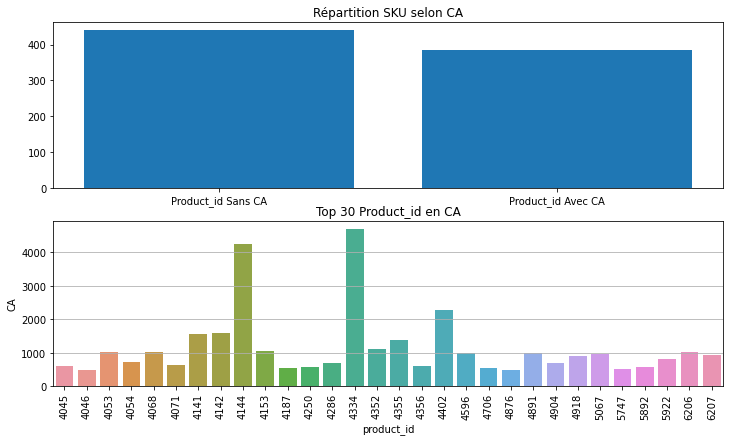

In [31]:

plt.figure(figsize=(12,14))

#Visualiser la répartition de sku selon CA généré ou Non
plt.subplot(411)
plt.bar(['Product_id Sans CA','Product_id Avec CA'],[ERP[ERP['CA']==0]['product_id'].count(),ERP[ERP['CA']!=0]['product_id'].count()])
plt.title('Répartition SKU selon CA')

# Visualiser les top30 sku selon CA généré
plt.subplot(412)
sns.barplot(data=ERP.head(30),x='product_id',y='CA')
plt.xticks(rotation=90)
plt.title('Top 30 Product_id en CA')
plt.grid(axis='y')

# Clarifier la situation de top30 CA
print('Le nombre de product_id avec un CA >= 2000 est :', ERP[ERP['CA']>=2000]['product_id'].count())
print('Le nombre de product_id avec un CA entre 1000 et 2000 est :', ERP[(ERP['CA']>=1000)&(ERP['CA']<2000)]['product_id'].count())

# Mission 3 Le total du chiffre d’affaires réalisé en ligne

## 1.Calculer le chiffre d'affaire total 
     Via le Calcul de le total de chiffre d'affaire sur le tableau ERP, on trouve CA total est 70568

In [32]:
print('Le total de Chiffre d\'affaire sur le site est:\n',ERP['CA'].sum())

Le total de Chiffre d'affaire sur le site est:
 70568.6


### 2. Etudier le chiffre d'affaire total selon le classement du prix des produits 
     Pour voir le détail de chiffre d'affaire total, on va voir le total de chiffre d'affaire réalisé par type de product_id. Comme le nombre de product_id est volumineux, on va grouper les product_id par le classement de prix.

### 2.1 Pour définir les classements de prix, on va voir d'abord la description statistique et la distribution graphique des prix pour définir les seuils.

    Le prix minimum est 5.2
    le prix maximum est 225
    la moyenne de prix est 32.41
    la mode de prix est 45 qui supérieur à la moyenne
    C'est une distribution s'étale à droit (skew = 2.62), et plus concentré que la distribution normal (kurtosis=10.62)

#### Selon la distribution de prix, on pourra définir l'échelle de prix [25,50,100,150]


count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

Le mode de prix est: 45.0
Le coéfficient de variance de prix est: 0.83
La mesure asymétrie de prix est: 2.62 Il indique la distribution s'étale à droite
Le mesure aplatissement de distrubution de prix est: 10.62 Il indique la distribution est plus concentré par rapport à la distribution normale


Text(0, 0.5, 'Nombre Product_id')

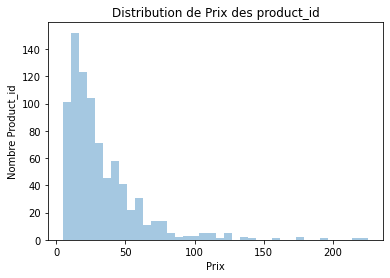

In [33]:
# Voir le description statistique de prix dans ERP

display(ERP.price.describe())

print('Le mode de prix est:',ERP.price.mode()[0])
print('Le coéfficient de variance de prix est:',round(ERP.price.std()/ERP.price.mean(),2))
print('La mesure asymétrie de prix est:',round(ERP.price.skew(),2),'Il indique la distribution s\'étale à droite')
print('Le mesure aplatissement de distrubution de prix est:', round(ERP.price.kurtosis(),2), 'Il indique la distribution est plus concentré par rapport à la distribution normale')

# Visualiser la distribution du prix des product_id

sns.distplot(ERP['price'], kde=False)
plt.title('Distribution de Prix des product_id')
plt.xlabel('Prix')
plt.ylabel('Nombre Product_id')

### 2.2 On crée une nouvelle colonne classementPrix dans ERP pour labelliser les product_id

In [34]:
#Créer colonne classementPrix en donnant un valeur par défaut
ERP['classementPrix']=0

#Attribuer le valeur à la colonne classementPrix en fonction des filtre sur le prix
ERP.loc[(ERP.price<=50),'classementPrix']='<25'
ERP.loc[(ERP.price<50)&(ERP.price>=25),'classementPrix']='25<50'
ERP.loc[(ERP.price<100)&(ERP.price>=50),'classementPrix']='50<100'
ERP.loc[(ERP.price<150)&(ERP.price>=100),'classementPrix']='100<150'
ERP.loc[(ERP.price>=150),'classementPrix']='>=150'

#Visualiser le résultat
ERP.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix
203,4334,1,49.0,0,outofstock,7818,champagne-gosset-grand-blanc-de-blanc,96.0,sku connu,4704.0,25<50
74,4144,1,49.0,11,instock,1662,champagne-gosset-grand-rose,87.0,sku connu,4263.0,25<50


### 2.3 On groupe le chiffre d'affaire par classementPrix

    On trouve 
    Les product_id avec un prix entre 25 et 50 réalisent le plus de vente 29669 (=42% de chiffre d'affaire)
    Les product_id avec un prix < 25 réalisent le plus de vente 25593 (=36% de chiffre d'affaire)
    Les 3 autres classes (prix entre 50 et 150) s'occupe de 22% de CA soit 15304

#### On affiche le CA par classement de prix dans les graphiques



,classementPrix,CA,Proportion De CA
1,25<50,29669.4,0.42
3,<25,25593.4,0.36
2,50<100,8421.4,0.12
4,>=150,3986.9,0.06
0,100<150,2897.5,0.04


Text(True, 0.4, 'Produits avec prix < 50 \n réalisent 78% de CA!!!')

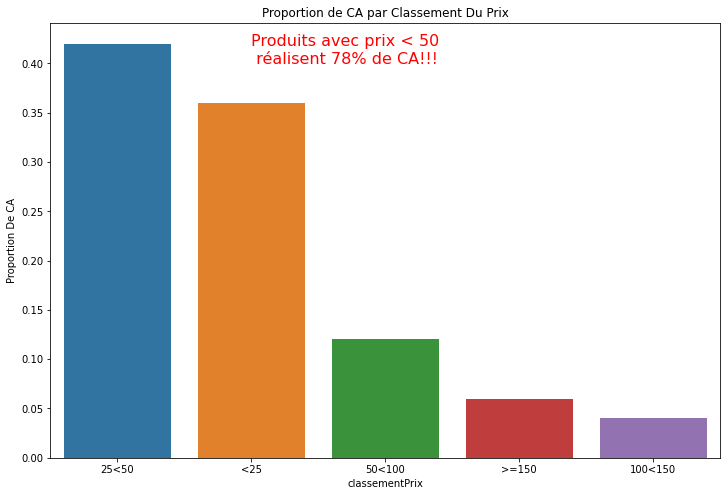

In [35]:
#Regrouper le CA et le nombre de vente de ERP par Classement du prix des product_id dans une dataframe ERPClassementPrix
ERPClassementPrix=ERP.groupby(['classementPrix'],as_index=False).agg({'CA':sum}).sort_values(by=['CA'],ascending=False)

# Calculer la proportion de CA contribué par chaque classement de prix
ERPClassementPrix['Proportion De CA']=ERPClassementPrix['CA']/ERPClassementPrix['CA'].sum()
ERPClassementPrix['Proportion De CA']=ERPClassementPrix['Proportion De CA'].round(2)

#Voir le résultat
display(ERPClassementPrix.head())

#Visualiser la contribution de chiffre d'affaire et le nombre de vente par classement du prix
plt.figure(figsize=(12,8))
sns.barplot(data=ERPClassementPrix,x='classementPrix',y='Proportion De CA')
plt.title('Proportion de CA par Classement Du Prix')
plt.text(50<100,0.40,'Produits avec prix < 50 \n réalisent 78% de CA!!!',fontsize=16,c='red')


Text(0.5, -51.1907556728505, 'Classement Du Prix')

<Figure size 864x576 with 0 Axes>

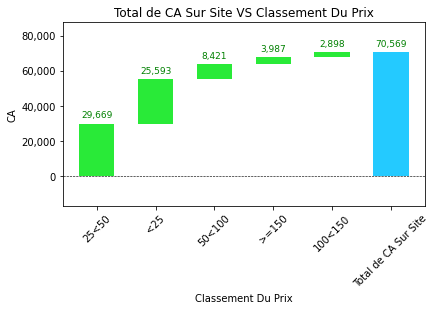

In [36]:


import waterfall_chart
import matplotlib.pyplot as plt
x = ERPClassementPrix.CA
label=ERPClassementPrix.classementPrix

plt.figure(figsize=(12,8))
waterfall_chart.plot(label, x, net_label='Total de CA Sur Site',rotation_value=45,formatting='{:,.0f}')
plt.title("Total de CA Sur Site VS Classement Du Prix")
plt.ylabel("CA")
plt.xlabel("Classement Du Prix")

# Mission 4  Détecter les valeurs aberrantes dans le prix des produits
    On utilisera 3 méthodes pour identifier les valeurs abérrantes dans le prix de ERP
    Méthode 1: Méthode quantile
    Méthode 2: Méthode quantile avec un pourcentage de l'erreur préconisé (ici, on préconise 5% de valeurs sont aberrantes)
    Méthode 3: Méthode Z-score (ici, on va préconiser un threshold de 3 pour identifier les valeurs aberrantes)

## 1. Via boxplot, on va voir la distribution des prix de product_id

Text(0.5, 0, 'Prix')

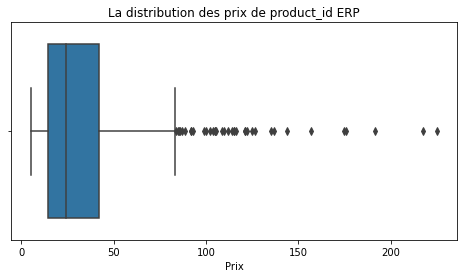

In [37]:
plt.figure(figsize=(8,4))
sns.boxplot(ERP.price)
plt.title('La distribution des prix de product_id ERP')
plt.xlabel('Prix')

## 2. Méthode Quantile 1 avec calcul de pour identifier prix abérrant

    Q1 est 0.25 de valeur cible, Q3 est 0.75 de valeur cible
    Seuil bas = Q1-(Q3-Q1) x 1.5 
    Seuil haut = Q3+(Q3-Q1) x 1.5
    On trouve:
    La valeur Q1 est: 14.6
    La valeur Q3 est: 42.0
    L'interval entre Q3 et Q1 est: 27.4
    Seuil bas= -26.5 
    Seuil haut=83.1
#### La seuil bas n'est pas utile dans notre cas car notre prix minimum est 5.2, c'est à dire qu'il n'y a pas de outliers sur la zone < Q1
    37 produits identifiés avec la seuil haut qui ont le prix aberrant
    
    liste des produits concernés:
[4055 4115 4132 4352 4355 4359 4402 4404 4406 4407 4582 4594 4903 4904 5001 5007 5008 5025 5026 5070 5565 5580 5612 5767 5892 5916 5917 5918 6126 6201 6202 6212 6213 6214 6215 6216 6324]

In [38]:
#Calculer Seuil Haut et Seuil Bas pour identifier les prix aberrants
Q1 = np.quantile(ERP['price'],0.25)
Q3 = np.quantile(ERP['price'],0.75)

#Inverval Q3 et Q1
DifférenceQ3Q1=Q3-Q1

#Calculer la seuil bas et la seuil haut pour identifier les outliers
SeuilBas = Q1-(DifférenceQ3Q1*1.5)
SeuilHaut = Q3+(DifférenceQ3Q1*1.5)

#Affichier valeurs Q1, Q3, et l'interval entre Q3 et Q1
print('La valeur Q1 est:',Q1)
print('La valeur Q3 est:',Q3)
print('L\'interval entre Q3 et Q1 est:', DifférenceQ3Q1)


#On voit que la seuil bas < le prix minimum (5), nous utiliserons seulement le seuil haut
print('SeuilBas:', round(SeuilBas,2), 'SeuilHaut:', SeuilHaut)

prixAberrantMéthode1=ERP[ERP['price']>=83.1]
print('Nombre de produit_id concerné par les prix aberrants:\n',prixAberrantMéthode1['product_id'].count())
print('Liste de produit_id concerné par les prix aberrants:\n',prixAberrantMéthode1['product_id'].unique())
display(prixAberrantMéthode1.head())

La valeur Q1 est: 14.6
La valeur Q3 est: 42.0
L'interval entre Q3 et Q1 est: 27.4
SeuilBas: -26.5 SeuilHaut: 83.1
Nombre de produit_id concerné par les prix aberrants:
 37
Liste de produit_id concerné par les prix aberrants:
 [4402 4355 4352 4904 5892 6126 6212 4404 4407 4359 6324 5767 6201 6202
 6216 6215 6214 6213 5918 5917 5916 4594 4582 4406 4132 4115 4055 5070
 5026 5025 5008 5007 5612 5580 5565 5001 4903]


,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix
227,4402,1,176.0,8,instock,3510,cognac-frapin-vip-xo,13.0,sku connu,2288.0,>=150
210,4355,1,126.5,2,instock,12589,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,11.0,sku connu,1391.5,100<150
208,4352,1,225.0,0,outofstock,15940,champagne-egly-ouriet-grand-cru-millesime-2008,5.0,sku connu,1125.0,>=150
411,4904,1,137.0,13,instock,14220,domaine-des-croix-corton-charlemagne-grand-cru...,5.0,sku connu,685.0,100<150
635,5892,1,191.3,10,instock,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3.0,sku connu,573.9,>=150


#### Visualiser outliers détecter par Méthode 1 Quantile Classique

,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix,Quantile Classique
203,4334,1,49.0,0,outofstock,7818,champagne-gosset-grand-blanc-de-blanc,96.0,sku connu,4704.0,25<50,Normal
74,4144,1,49.0,11,instock,1662,champagne-gosset-grand-rose,87.0,sku connu,4263.0,25<50,Normal
227,4402,1,176.0,8,instock,3510,cognac-frapin-vip-xo,13.0,sku connu,2288.0,>=150,Outliers
73,4142,1,53.0,8,instock,11641,champagne-gosset-grand-millesime-2006,30.0,sku connu,1590.0,50<100,Normal
72,4141,1,39.0,1,instock,304,gosset-champagne-grande-reserve,40.0,sku connu,1560.0,25<50,Normal


Text(0, 0.5, 'total_sales')

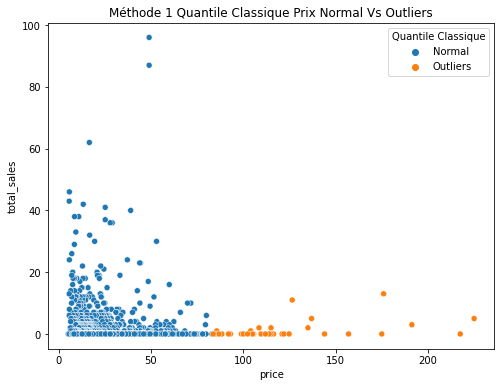

In [39]:
#Créer une nouvelle colonne dans ERP pour étiquetter les produits avec un prix outliers
ERP['Quantile Classique']=0
ERP.loc[(ERP.price>=83.1),'Quantile Classique']='Outliers'
ERP.loc[(ERP.price<83.1),'Quantile Classique']='Normal'
display(ERP.head())

#Créer graphique nuage de point prix et total de vente en affichant le classement des produits selon méthode quantile classique
plt.figure(figsize=(8,6))
sns.scatterplot(x='price',y='total_sales',hue='Quantile Classique',data=ERP)
plt.title('Méthode 1 Quantile Classique Prix Normal Vs Outliers')
plt.xlabel('price')
plt.ylabel('total_sales')

## 3. Méthode 2 Quantile avec un pourcentage d'erreur 0.05 préconisé pour identifier les valeurs de prix abérrant

    On va considèrer qu'il existe 5% de prix abbérant en hypothèse
    Dans le boxplot ci dessus, il n'y a pas de outliers au déssous de Q1, donc on va chercher l'outlier au dessus de Q3.
    Avec l'hypothèse de 5% de valeur de prix en erreur, on trouve la seuil haut = 79.2
    Quand on filtre ERP avec le prix 79.2, 42 produits identifiés comme les produits avec les prix aberrants

    liste des produits concernés:
    
 [4046 4055 4115 4132 4210 4337 4350 4352 4353 4355 4359 4402 4404 4406
 4407 4582 4594 4903 4904 5001 5007 5008 5025 5026 5070 5565 5580 5612
 5767 5892 5916 5917 5918 6126 6201 6202 6212 6213 6214 6215 6216 6324]

In [40]:
#Selon boxplot, il n'y a pas de outliers en dessous de Q1
# On définit la limite de prix haut, les prix supérieur à ce seuil sera considèré comme outliers

#Trouver la seuil haut avec la quantile 95%
limitePrixHaut=ERP['price'].quantile(.95)

#Filter ERP avec la seuil haut
PrixAberrant_Methode2=ERP[ERP['price']>limitePrixHaut]

print('La seuil haut pour identifier les prix aberrants est :',limitePrixHaut.round(2))

print('Nombre de product_id sont susceptible d\'avoir un erreur de prix:\n', PrixAberrant_Methode2['product_id'].count())

print('liste de product_id sont susceptible d\'avoir un erreur de prix:\n', PrixAberrant_Methode2['product_id'].unique())

display(PrixAberrant_Methode2.head())

La seuil haut pour identifier les prix aberrants est : 79.2
Nombre de product_id sont susceptible d'avoir un erreur de prix:
 42
liste de product_id sont susceptible d'avoir un erreur de prix:
 [4402 4355 4352 4904 5892 4046 6126 4353 6212 4404 4407 4359 6324 5767
 6201 6202 6216 6215 6214 6213 5918 5917 5916 4594 4582 4406 4350 4337
 4132 4115 4055 4210 5070 5026 5025 5008 5007 5612 5580 5565 5001 4903]


,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix,Quantile Classique
227,4402,1,176.0,8,instock,3510,cognac-frapin-vip-xo,13.0,sku connu,2288.0,>=150,Outliers
210,4355,1,126.5,2,instock,12589,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,11.0,sku connu,1391.5,100<150,Outliers
208,4352,1,225.0,0,outofstock,15940,champagne-egly-ouriet-grand-cru-millesime-2008,5.0,sku connu,1125.0,>=150,Outliers
411,4904,1,137.0,13,instock,14220,domaine-des-croix-corton-charlemagne-grand-cru...,5.0,sku connu,685.0,100<150,Outliers
635,5892,1,191.3,10,instock,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3.0,sku connu,573.9,>=150,Outliers


#### Visualiser outliers détectés par Méthode 2 Quantile avec 5% de Marge Erreur

,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix,Quantile Classique,Quantile 5% Marge Erreur
203,4334,1,49.0,0,outofstock,7818,champagne-gosset-grand-blanc-de-blanc,96.0,sku connu,4704.0,25<50,Normal,Normal
74,4144,1,49.0,11,instock,1662,champagne-gosset-grand-rose,87.0,sku connu,4263.0,25<50,Normal,Normal
227,4402,1,176.0,8,instock,3510,cognac-frapin-vip-xo,13.0,sku connu,2288.0,>=150,Outliers,Outliers
73,4142,1,53.0,8,instock,11641,champagne-gosset-grand-millesime-2006,30.0,sku connu,1590.0,50<100,Normal,Normal
72,4141,1,39.0,1,instock,304,gosset-champagne-grande-reserve,40.0,sku connu,1560.0,25<50,Normal,Normal


Text(0, 0.5, 'total_sales')

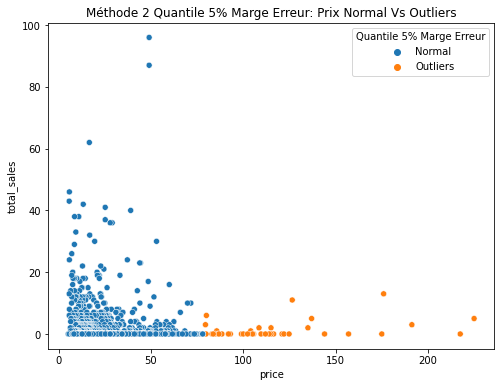

In [41]:
#Créer une nouvelle colonne dans ERP pour étiquetter les produits avec un prix outliers
ERP['Quantile 5% Marge Erreur']=0
ERP.loc[(ERP.price>79.2),'Quantile 5% Marge Erreur']='Outliers'
ERP.loc[(ERP.price<=79.2),'Quantile 5% Marge Erreur']='Normal'
display(ERP.head())

#Créer graphique nuage de point prix et total de vente en affichant le classement des produits selon méthode 2 quantile avec 5% de marge erreur
plt.figure(figsize=(8,6))
sns.scatterplot(x='price',y='total_sales',hue='Quantile 5% Marge Erreur',data=ERP)
plt.title('Méthode 2 Quantile 5% Marge Erreur: Prix Normal Vs Outliers')
plt.xlabel('price')
plt.ylabel('total_sales')

## 4. Méthode 3 Z-Score pour identifier les prix aberrants

    Formule à appliquer: z_score=(prix-moyenne du prix)/standard déviation de prix

    Quand le valeur absolue de z_score > threshold (souvent= 2 ou 3), on considère qu'il s'agit un valeur aberrante

    On a trouvé: 
    Seuil = 86.1
    Nombre des produits concernés = 34
    
    Liste des produit :
[4352 4355 4402 4406 4594 4904 5001 5612 5767 5892 5917 5918 6126 6202 6212 6213 6215 6216]

In [42]:

#Créer un liste PrixAberrant pour stocker les outliers identifiés
PrixAberrant=[]

#On préconise que le threshold de Z-score est 2

threshold=2

# Construire le liste des prix aberrants

for i in ERP['price']:
    z_score=(i-np.mean(ERP['price']))/np.std(ERP['price'])
    if np.abs(z_score)>threshold:
        PrixAberrant.append(i)
        
print('list des prix aberrant\n:',PrixAberrant)  

#Trouver la valeur minimume des prix aberrants
print('Le valeur minimum de prix aberrant:\n',min(PrixAberrant))

#Affichier le dataframe des produits avec prix aberrant (filter ERP avec le prix aberrant minimume trouvé)

PrixAberrant_Methode3=ERP[ERP['price']>=min(PrixAberrant)]
print('le nombre de produits concernés par les prix aberrants:\n',PrixAberrant_Methode3.product_id.count())
print('Liste de produits concernés par les prix aberrants:\n',PrixAberrant_Methode3.product_id.unique())

display(PrixAberrant_Methode3.head())

list des prix aberrant
: [176.0, 126.5, 225.0, 137.0, 191.3, 135.0, 115.0, 108.5, 104.0, 92.0, 175.0, 105.6, 116.4, 121.0, 115.0, 99.0, 121.0, 114.0, 122.0, 93.0, 144.0, 109.6, 157.0, 88.4, 100.0, 86.1, 86.8, 112.0, 105.0, 105.0, 124.8, 92.0, 217.5, 102.3]
Le valeur minimum de prix aberrant:
 86.1
le nombre de produits concernés par les prix aberrants:
 34
Liste de produits concernés par les prix aberrants:
 [4402 4355 4352 4904 5892 6126 6212 4404 4407 6324 5767 6201 6202 6216
 6215 6214 6213 5918 5917 5916 4594 4582 4406 4132 4115 4055 5026 5025
 5008 5007 5612 5565 5001 4903]


,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix,Quantile Classique,Quantile 5% Marge Erreur
227,4402,1,176.0,8,instock,3510,cognac-frapin-vip-xo,13.0,sku connu,2288.0,>=150,Outliers,Outliers
210,4355,1,126.5,2,instock,12589,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,11.0,sku connu,1391.5,100<150,Outliers,Outliers
208,4352,1,225.0,0,outofstock,15940,champagne-egly-ouriet-grand-cru-millesime-2008,5.0,sku connu,1125.0,>=150,Outliers,Outliers
411,4904,1,137.0,13,instock,14220,domaine-des-croix-corton-charlemagne-grand-cru...,5.0,sku connu,685.0,100<150,Outliers,Outliers
635,5892,1,191.3,10,instock,14983,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3.0,sku connu,573.9,>=150,Outliers,Outliers


#### Visualiser outliers détectés par Méthode 3 Z-Score

,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix,Quantile Classique,Quantile 5% Marge Erreur,Z-Score
203,4334,1,49.0,0,outofstock,7818,champagne-gosset-grand-blanc-de-blanc,96.0,sku connu,4704.0,25<50,Normal,Normal,Normal
74,4144,1,49.0,11,instock,1662,champagne-gosset-grand-rose,87.0,sku connu,4263.0,25<50,Normal,Normal,Normal
227,4402,1,176.0,8,instock,3510,cognac-frapin-vip-xo,13.0,sku connu,2288.0,>=150,Outliers,Outliers,Outliers
73,4142,1,53.0,8,instock,11641,champagne-gosset-grand-millesime-2006,30.0,sku connu,1590.0,50<100,Normal,Normal,Normal
72,4141,1,39.0,1,instock,304,gosset-champagne-grande-reserve,40.0,sku connu,1560.0,25<50,Normal,Normal,Normal


Text(0, 0.5, 'total_sales')

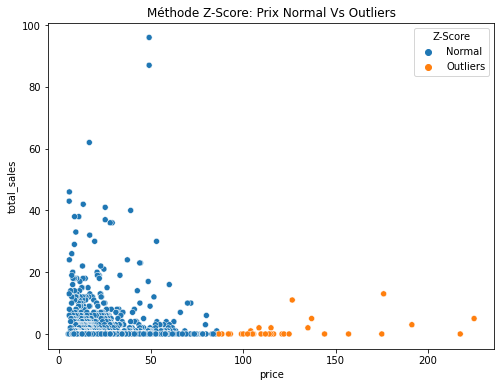

In [43]:
#Créer une nouvelle colonne dans ERP pour étiquetter les produits avec un prix outliers
ERP['Z-Score']=0
ERP.loc[(ERP.price>=86.1),'Z-Score']='Outliers'
ERP.loc[(ERP.price<86.1),'Z-Score']='Normal'
display(ERP.head())

#Créer graphique nuage de point prix et total de vente en affichant le classement des produits selon méthode 3 Z-score
plt.figure(figsize=(8,6))
sns.scatterplot(x='price',y='total_sales',hue='Z-Score',data=ERP)
plt.title('Méthode Z-Score: Prix Normal Vs Outliers')
plt.xlabel('price')
plt.ylabel('total_sales')

## 5. Visualiser la différence de nombre de product_id détectés qui ont un risque de prix aberrant avec 3 méthodes

Text(0, 0.5, 'Nombre de Product_id')

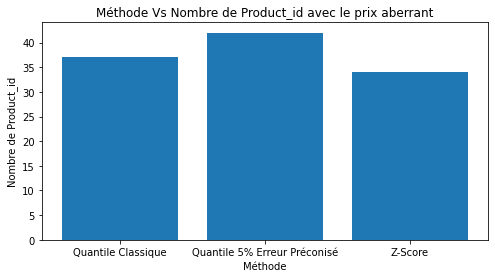

In [44]:

plt.figure(figsize=(8,4))
x=['Quantile Classique','Quantile 5% Erreur Préconisé','Z-Score']
y=[prixAberrantMéthode1['product_id'].count(), PrixAberrant_Methode2['product_id'].count(), PrixAberrant_Methode3.product_id.count()]

plt.bar(x,y)
plt.title('Méthode Vs Nombre de Product_id avec le prix aberrant')
plt.xlabel('Méthode')
plt.ylabel('Nombre de Product_id')

# Mission 5 Approfondir l'analyse de la situation de stock et de vente

## 1. Analyse cumsum de CA et le nombre de vente

     On a trouvé que 200 sur 825 product_id connu (soit 24% de product_id) generent 90% de chiffre d'affaire et 88% de nombre de vente.
    Si on réfléchisse en 'sku', il s'agit de 200 sku sur 714 sku total (soit 28% de sku)

tableau Cumsum de CA:


,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix,Quantile Classique,Quantile 5% Marge Erreur,Z-Score,Pourcentage CA,Pourcentage Vente en Quantité,Pourcentage Cumsum en CA
203,4334,1,49.0,0,outofstock,7818,champagne-gosset-grand-blanc-de-blanc,96.0,sku connu,4704.0,25<50,Normal,Normal,Normal,0.066659,0.033508,0.066659
74,4144,1,49.0,11,instock,1662,champagne-gosset-grand-rose,87.0,sku connu,4263.0,25<50,Normal,Normal,Normal,0.060409,0.030366,0.127068


---------------------------------------------------------------------------------------------------------------
tableau Cumsum de Nombre de Vente:


,product_id,onsale_web,price,stock_quantity,stock_status,sku,post_name,total_sales,statu sku,CA,classementPrix,Quantile Classique,Quantile 5% Marge Erreur,Z-Score,Pourcentage CA,Pourcentage Vente en Quantité,Pourcentage Cumsum en Quantité
203,4334,1,49.0,0,outofstock,7818,champagne-gosset-grand-blanc-de-blanc,96.0,sku connu,4704.0,25<50,Normal,Normal,Normal,0.066659,0.033508,0.033508
74,4144,1,49.0,11,instock,1662,champagne-gosset-grand-rose,87.0,sku connu,4263.0,25<50,Normal,Normal,Normal,0.060409,0.030366,0.063874


24.24 % de product_id réalise environ 90% de CA et Nombre de Vente
28.01 % de sku réalise environ 90% de CA et Nombre de Vente
51.95 % de produits avec une vente réalise environ 90% de CA et Nombre de Vente


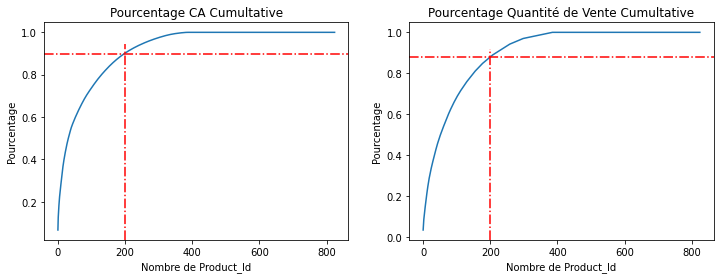

In [45]:
# Calculer le pourcentage cumultative pour voir combien de sku génére le plus de CA
ERP['Pourcentage CA']=ERP['CA']/ERP['CA'].sum()
ERP['Pourcentage Vente en Quantité']=ERP['total_sales']/ERP['total_sales'].sum()

ERPCAcumsum=ERP.sort_values(by='CA',ascending=False)
ERPCAcumsum['Pourcentage Cumsum en CA']=ERPCAcumsum['Pourcentage CA'].cumsum()

# Calculer le pourcentage cumultative pour voir combien de sku génére le plus de CA

ERPVentecumsum=ERP.sort_values(by='total_sales',ascending=False)
ERPVentecumsum['Pourcentage Cumsum en Quantité']=ERPVentecumsum['Pourcentage Vente en Quantité'].cumsum()

print('tableau Cumsum de CA:')
display(ERPCAcumsum.head(2))

print('---------------------------------------------------------------------------------------------------------------')
print('tableau Cumsum de Nombre de Vente:')
display(ERPVentecumsum.head(2))


plt.figure(figsize=(12,4))

#Visualiser pourcentage cumultative: 200sku (24% de 825sku) a généré 90% de CA
plt.subplot(121)
plt.plot(range(0,825),ERPCAcumsum['Pourcentage Cumsum en CA'])
plt.axhline(y=0.9,xmin=0,xmax=200,c='r',linestyle='-.')
plt.axvline(x=200,ymin=0,ymax=0.9,c='r',linestyle='-.')
plt.title('Pourcentage CA Cumultative')
plt.xlabel('Nombre de Product_Id')
plt.ylabel('Pourcentage')


#Visualiser pourcentage cumultative: 200sku (24% de 825sku) a généré 88% de CA
plt.subplot(122)
plt.plot(range(0,825),ERPVentecumsum['Pourcentage Cumsum en Quantité'])
plt.axhline(y=0.88,xmin=0,xmax=200,c='r',linestyle='-.')
plt.axvline(x=200,ymin=0,ymax=0.88,c='r',linestyle='-.')
plt.title('Pourcentage Quantité de Vente Cumultative')
plt.xlabel('Nombre de Product_Id')
plt.ylabel('Pourcentage')

print(round(200/825*100,2),'% de product_id réalise environ 90% de CA et Nombre de Vente')
print(round(200/714*100,2),'% de sku réalise environ 90% de CA et Nombre de Vente')
print(round(200/385*100,2),'% de produits avec une vente réalise environ 90% de CA et Nombre de Vente')

## 2. Analyse La distribution de CA et le nombre de vente en fonction de nombre de product_id

     On trouve que la vente est réalisé sur une large variété des product_id. 
     Exemple seulement 29 produits avec un CA supérieur à 500, 26 produits avec un nombre de vente supérieur à 20.

     Excepte quelques produits particulier, la vente n'est pas du tout concentré.

#### Avec cette situation, il est favorable que l'entreprise applique un statégie de maintenir la disponibilité sur une large variété des produits mais avec une faible stock sur chaque produit.

Nombre de product_id avec un CA >500: 29
Nombre de product_id avec un Nombre de Vente >20: 26


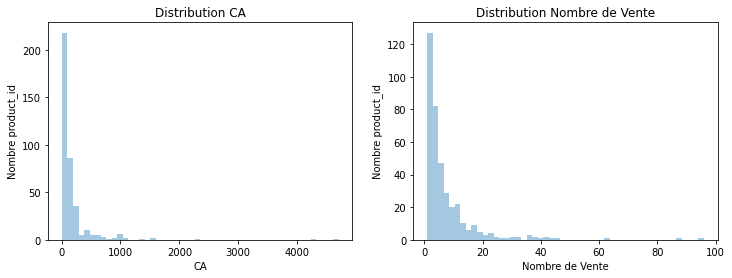

In [46]:
plt.figure(figsize=(12,4))

#Visualiser la distribution de CA
plt.subplot(121)
sns.distplot(ERP[ERP['CA']!=0]['CA'], kde=False)
plt.title('Distribution CA')
plt.xlabel('CA')
plt.ylabel('Nombre product_id')

#Visualiser la distribution de Nombre de Vente
plt.subplot(122)
sns.distplot(ERP[ERP['total_sales']!=0]['total_sales'], kde=False)
plt.title('Distribution Nombre de Vente')
plt.xlabel('Nombre de Vente')
plt.ylabel('Nombre product_id')

print('Nombre de product_id avec un CA >500:', ERP[ERP['CA']>500].sku.count())
print('Nombre de product_id avec un Nombre de Vente >20:', ERP[ERP['total_sales']>20].sku.count())

## 3. Analyse de Quantité vendu et le niveau de Stock

    Selon la nuage de point des produits en fonction de le nombre de vente et le stock de chaque produit, on separe les produits en 4 groupes.

    Groupe 1   Vente <= 20 ET Stock <= 150 ==> Traiter le problème de équisement de stock et de destakage
    Groupe 2   Vente <= 20 ET Stock > 150 ==> Traiter le problème de sur-stockage
    Groupe 3   Vente > 20 ET Stock > 150 ==> Zone correct, Sans action.
    Groupe 4   Vente > 20 ET Stock <= 150 ==> Traiter le problème de sous-stockage

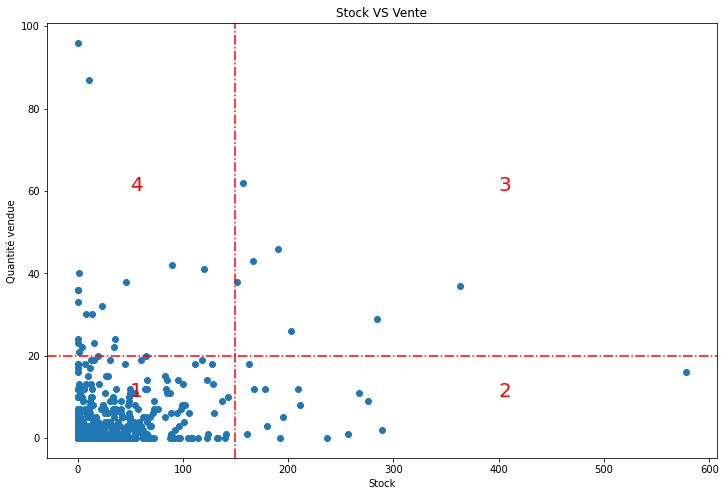

In [47]:
#Visualiser le niveau de stock par rapport aux nombres de ventes de chaque sku (ou product_id)

plt.figure(figsize=(12,8))
plt.scatter(x=ERP.stock_quantity, y=ERP.total_sales)
plt.title('Stock VS Vente')
plt.xlabel('Stock')
plt.ylabel('Quantité vendue')
plt.text(50,10,'1',fontsize=20,c='red')
plt.text(400,10,'2',fontsize=20,c='red')
plt.text(400,60,'3',fontsize=20,c='red')
plt.text(50,60,'4',fontsize=20,c='red')


#Selon concentration des points, on coupe le graphique en 4 parties.
plt.axhline(y=20,xmin=0,xmax=600,c='r',linestyle='-.')
plt.axvline(x=150,ymin=0,ymax=200,c='r',linestyle='-.')

### 3.1 Traitement de Groupe 1

    Groupe1 est les produits avec Quantité vendu <=20 et le stock <= 150.
    Dans ce groupe, on doit faire analyser les cas extremes comme stock 0 ou quantité vendue 0.
    Quand un produit_id a une vente, mais le stock est à '0', il faut le réapprovisionner.
    Quand un produit_id a une stock, mais la vente est à '0', il faut le destocker.
#### On a identifié 62 produits à réapprovisionner dans groupe 1.
#### On a identifié 255 produits à destocker dans groupe 1 qui concernent 5696 bouteilles de vin.


In [48]:
#Enlever les données de 'sku inconnu', les nouveaux produits sans sku officialisé ne sont pas concernés
ERPSkuConnu=ERP[ERP['statu sku']=='sku connu']

#Créer Groupe 1 avec les données filtrés
Groupe1=ERPSkuConnu[(ERPSkuConnu['total_sales']<=20)&(ERPSkuConnu['stock_quantity']<=150)]

#Quand un produit_id a une vente, mais le stock est à '0', il faut le réapprovisionner, créer 'Groupe1stock0' pour les identifier

Groupe1stock0=Groupe1[(Groupe1['stock_quantity']==0)&(Groupe1['total_sales']>0)]
print('Groupe1:Nombre des références à réapprovisionner:\n',Groupe1stock0['product_id'].count())
print('Groupe1:Liste des références à réapprovisionner:\n',Groupe1stock0['product_id'].unique())


# Les product_id qui n'a pas eu la vente historique, mais avec un stock disponible, doivent être destocker

#Créer Groupe1Vente0 pour les identifier

Groupe1Vente0=Groupe1[(Groupe1['stock_quantity']>0)&(Groupe1['total_sales']==0)]
print('Groupe1:Nombre des références à destocker:\n',Groupe1Vente0['product_id'].count())
print('Groupe1:Liste des références à destocker:\n',Groupe1Vente0['product_id'].unique())
print('Groupe1:Nombre de bouteilles à destocker:\n',Groupe1Vente0['stock_quantity'].sum())


Groupe1:Nombre des références à réapprovisionner:
 62
Groupe1:Liste des références à réapprovisionner:
 [4352 5067 5922 4054 4046 5545 6578 4925 4205 4954 5439 5950 5474 5826
 4151 5000 4258 4081 4138 6042 4919 3847 4717 4050 4056 4597 5899 4932
 6137 5905 4359 4893 6225 4277 4910 4160 4108 4190 5712 4704 4726 4211
 5700 4032 6109 5524 5768 5806 4863 4159 4927 5804 5484 4235 4219 4186
 4712 5375 4722 6093 4231 4867]
Groupe1:Nombre des références à destocker:
 255
Groupe1:Liste des références à destocker:
 [5816 5802 5810 5890 5818 7025 7023 5820 5817 5801 5715 5706 5704 5703
 5697 5696 7247 5690 5771 5797 5796 5795 5794 5777 5767 5766 6201 6622
 6129 6626 6127 6628 6631 6107 6106 6620 6101 6663 6664 6666 6095 6094
 6753 6073 6202 6205 6575 6328 6301 6299 6279 6567 6568 6584 6618 6222
 6221 6585 6592 5628 6216 6215 6214 6213 6615 5918 5917 5916 6325 5913
 5912 5907 5904 5903 5902 6920 5896 5932 6887 6041 6038 5968 5967 5963
 5962 5960 5959 5958 5956 6884 5951 5629 4907 5619 4582 4573 45

### 3.2 Traitement de Groupe 2

    Dans le groupe 2, les produits sont avec une vente <=20 bouteilles, mais un stock relativement important > 150 bouteilles.
    Ca veut dire que ces produits sont sur-stocké et qu'il faut baisser le stock de ces produits en fonction de niveau de vente.

#### Nous avons trouvé: 14 produits dans le cas de stock à baisser
    Dans ce groupe, si la vente historique est 0, on doit les destocker comme groupe 1.(il n'existe pas de ce cas actuellement)



In [49]:
# En Groupe2, ce sont les product_id avec une vente moins important, mais stock elevé.
# Donc l'action de baisser le niveau de stock est nécessaire

Groupe2=ERPSkuConnu[(ERPSkuConnu['total_sales']<=20)&(ERPSkuConnu['stock_quantity']>150)]

# On voit qu'il n'y a pas de cas extreme, c'est à dire que product_id avec une vente 0 dans Groupe 2
Groupe2Vente0=Groupe2[(Groupe2['stock_quantity']>0)&(Groupe1['total_sales']==0)]
print('Groupe2:Nombre des références à destocker:\n',Groupe2Vente0['product_id'].count())

# On voit qu'il n'y a pas de product_id avec une vente 0 dans Groupe 2
print('Groupe2:Nombre des product_id dont son niveau de stock à baisser:\n',Groupe2['product_id'].count())
print('Groupe2:Liste des product_id dont son niveau de stock à baisser:\n',Groupe2['product_id'].unique())

Groupe2:Nombre des références à destocker:
 0
Groupe2:Nombre des product_id dont son niveau de stock à baisser:
 14
Groupe2:Liste des product_id dont son niveau de stock à baisser:
 [4779 4208 4176 4862 4191 4058 4681 5779 4207 4223 4963 4677 4858 4609]


### 3.3 Traitement de Groupe 4

    Groupe 4 sont les product_id ont les ventes importantes >20 bouteilles, mais son niveau de stock <= 150 bouteilles est moins compatible à la vente.Il est recommandé d'ajuster le niveau de stock selon la vente pour les reorienter vers Groupe1 et Groupe 3.
    Dans ce groupe, s'il existe les produits avec le stock = 0, il faut la réapprovisionner en priorité.

#### On a identifié 19 produits dont ses stocks doivent être augmenté dont 6 produits avec un stock 0 (à traiter en priorité).


In [50]:

Groupe4=ERPSkuConnu[(ERPSkuConnu['total_sales']>20)&(ERPSkuConnu['stock_quantity']<=150)]

#Vérifier s'il y a les cas extreme comme stock=0
Groupe4stock0=Groupe4[Groupe4['stock_quantity']==0]
print('Groupe4:Nombre product_id sans stock :\n ', Groupe4stock0['product_id'].count())
print('Groupe4:Liste de product_id sans stock :\n ', Groupe4stock0['product_id'].unique())

#Identifier tous les product_id de Groupe4
print('Groupe4:Nombre product_id :\n ', Groupe4['product_id'].count())
print('Groupe4:Liste de product_id:\n ', Groupe4['product_id'].unique())

Groupe4:Nombre product_id sans stock :
  6
Groupe4:Liste de product_id sans stock :
  [4334 4153 4596 4891 4918 4870]
Groupe4:Nombre product_id :
  19
Groupe4:Liste de product_id:
  [4334 4144 4142 4141 4153 6206 4053 4596 4891 4918 4250 4187 4706 5747
 4876 6047 4870 5519 5778]



### 3.4 Visualisation dans un graphique

    La graphique montre que le nombre de produits à destocker est important. Il est mieux que l'entreprise concentre aux produits en vente dans le future management et destocker et éliminer les produits sans vente pour avoir un meilleur flux financier et simplifier la complexité de la gestion des produits.

Text(A Diminuer(Groupe2), 200, '255 products  à destocker \n= 5696 bouteilles!!!!')

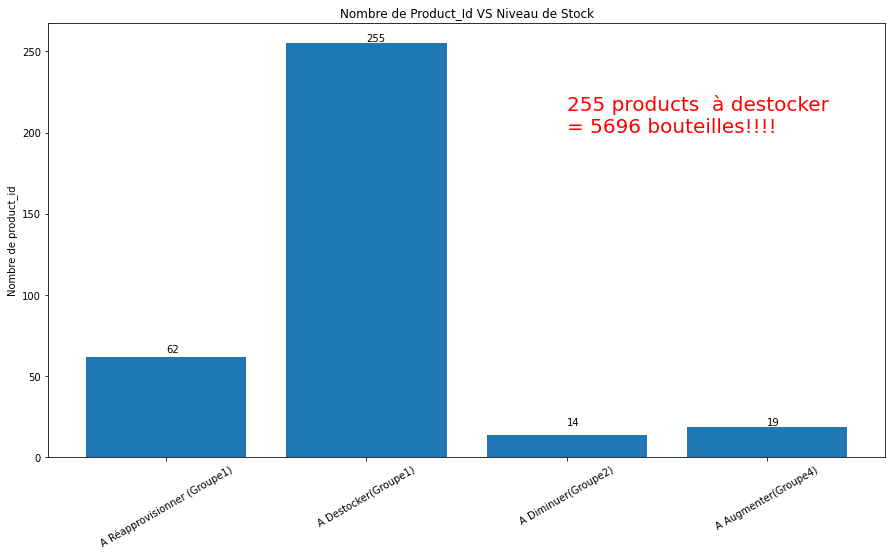

In [51]:

#Visualiser en graphique le résultat liés au traitement de Groupe1, Groupe2, Groupe4

a=['A Réapprovisionner (Groupe1)','A Destocker(Groupe1)','A Diminuer(Groupe2)','A Augmenter(Groupe4)']
b=[Groupe1stock0['product_id'].count(),Groupe1Vente0['product_id'].count(),Groupe2['product_id'].count(),Groupe4['product_id'].count()]

plt.figure(figsize=(15,8))
plt.bar(a,b)
plt.title('Nombre de Product_Id VS Niveau de Stock')
plt.xticks(rotation=30)
plt.ylabel('Nombre de product_id')
plt.text('A Réapprovisionner (Groupe1)',65,'62')
plt.text('A Destocker(Groupe1)',256,'255')
plt.text('A Diminuer(Groupe2)',20,'14')
plt.text('A Augmenter(Groupe4)',20,'19')
plt.text('A Diminuer(Groupe2)',200,'255 products  à destocker \n= 5696 bouteilles!!!!', fontsize=20,c='red')

## 4. Construction un outil visuel pour faciliter la gestion de niveau de stock des produits.

    On va regrouper les produits selon ses nombre de vente réalisé.
    Par la suite on va visualiser le total de vente par groupe, la moyenne de vente par groupe, la proportion de vente culmulative dans un graphique.
    L'entreprise pourra avoir rapidement la vision d'un produit selon la situation de groupe que le produit se situe.
    On affiche également le nombre de produits concerné par Groupe et la proportion de nombre de produit dans le total de catalogue.


### 4.1 Visualiser la distribution de vente vs nombre de produits en définissant les seuils de groupement
    On définisse 8 groupes avec l'échelle [0,5,10,15,20,40,60,80,100] selon la distribution.
    On garde seulement les produits avec vente en ajoutant la colonne'Groupe Vente' dans la dataframe.

,product_id,total_sales
count,385.000000,385.000000
mean,4882.867532,7.441558
std,737.259827,10.447156
min,3847.000000,1.000000
25%,4222.000000,2.000000
50%,4711.000000,4.000000
75%,5519.000000,9.000000
max,6930.000000,96.000000


,product_id,total_sales,Groupe_Vente
203,4334,96.0,80<Vente<100
74,4144,87.0,80<Vente<100
227,4402,13.0,10<Vente<15
73,4142,30.0,20<Vente<40
72,4141,40.0,20<Vente<40


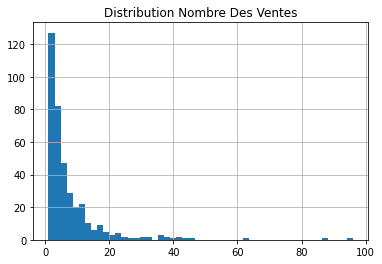

In [52]:
#On va retirer tous les product_id sans vente historique
#On stocker les product_id avec vente dans ERPavecVente en gardant seulement 2 colonnes utiles

ERPavecVente=ERP[ERP['total_sales']!=0]
ERPavecVente=ERPavecVente[['product_id','total_sales']]

#On visualise la statistique descriptive de colonne total_sales pour segmenter en groupe par la suite
display(ERPavecVente.describe())

#Visualiser la distribution de nombre des ventes pour définir le segment

ERPavecVente['total_sales'].hist(bins=50)
plt.title('Distribution Nombre Des Ventes')


# On va regrouper product_id en 8 groupes selon le nombre de vente
ERPavecVente['Groupe_Vente']=pd.cut(ERPavecVente['total_sales'],
                                   bins=[0,5,10,15,20,40,60,80,100],
                                    labels=['Vente<5','5<Vente<10','10<Vente<15','15<Vente<20','20<Vente<40','40<Vente<60','60<Vente<80','80<Vente<100'])

#affichier le résultat
display(ERPavecVente.head())

### 4.2 On calcule le total de vente et sa proportion cumulative par groupe et la moyenne de vente par groupe

In [53]:
#Créer dataframe GV pour stocker le résultat de l'agrégation par Groupe_Vente, 
#en prenant la moyenne de chaque groupe comme le nombre de vente de groupe

GV=ERPavecVente.groupby(['Groupe_Vente'],as_index=False).agg({'total_sales':sum})
GV=GV.sort_values(by='total_sales',ascending=False)


#calculer pourcentage cumulative de vente par groupe de product_id

GV['PourcentageVenteGV']=GV['total_sales']/GV['total_sales'].sum()
GV['Cumsum_PourcentageVenteGV']=GV['PourcentageVenteGV'].cumsum()
GV.reset_index(drop=True, inplace=True)

#Créer dataframe 'GV2' pour calculer la moyenne de nombre de vente par groupe
GV2=ERPavecVente.groupby(['Groupe_Vente'],as_index=False)['total_sales'].mean()
GV2.rename(columns={'total_sales':'moyenne_sales'},inplace=True)

#Ajouter la moyenne de nombre de vente par groupe à dataframe GV
GV=pd.merge(GV,GV2,how='left',on='Groupe_Vente')
display(GV.head())

,Groupe_Vente,total_sales,PourcentageVenteGV,Cumsum_PourcentageVenteGV,moyenne_sales
0,20<Vente<40,564.0,0.196859,0.196859,29.684211
1,Vente<5,553.0,0.193019,0.389878,2.393939
2,5<Vente<10,553.0,0.193019,0.582897,7.472973
3,10<Vente<15,451.0,0.157417,0.740314,12.527778
4,15<Vente<20,327.0,0.114136,0.854450,18.166667


### 4.3 On affiche le nombre de produits par groupe et la proportion de nombre de produits de chaque groupe.

In [54]:
#Créer dataframe GV3 pour calculer le nombre de produits par classement
GV3=ERPavecVente.groupby(['Groupe_Vente'],as_index=False)['product_id'].count()
GV3=GV3.rename({'product_id':'Nombre de Produits'},axis=1)

#Calculer la proportion de nombre de produits par classement
GV3['Proportion Nombre Produits par classe']=GV3['Nombre de Produits']/GV3['Nombre de Produits'].sum()
GV3['Proportion Nombre Produits par classe']=GV3['Proportion Nombre Produits par classe'].round(2)

display(GV3)


,Groupe_Vente,Nombre de Produits,Proportion Nombre Produits par classe
0,Vente<5,231,0.60
1,5<Vente<10,74,0.19
2,10<Vente<15,36,0.09
3,15<Vente<20,18,0.05
4,20<Vente<40,19,0.05
5,40<Vente<60,4,0.01
6,60<Vente<80,1,0.00
7,80<Vente<100,2,0.01


### 4.4 On construit la graphique type Pareto pour visualiser la situation de chaque groupe.

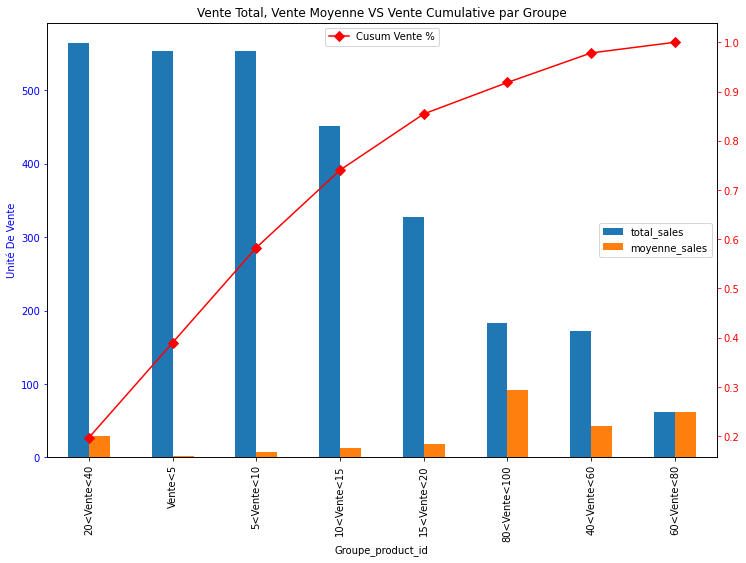

In [55]:
#Créer Graphique Pareto

fig,ax1 = plt.subplots(figsize=(12,8))

#Graphe pour vente total et vente moyen par groupe
GV.plot.bar(x='Groupe_Vente',y=['total_sales','moyenne_sales'],ax=ax1)
ax1.set_ylabel('Unité De Vente',color='blue')
ax1.tick_params(axis='y',colors='blue')
ax1.set_xlabel('Groupe_product_id')
ax1.set_xticklabels(GV['Groupe_Vente'])


#Graphe pour cumsum de vente
ax2=ax1.twinx()
ax2.plot(GV['Groupe_Vente'],GV['Cumsum_PourcentageVenteGV'],label="Cusum Vente %",color='red',marker='D',ms=7)
ax2.tick_params(axis='y',colors='red')

ax1.legend(loc=7)
ax2.legend(loc=9)

plt.title('Vente Total, Vente Moyenne VS Vente Cumulative par Groupe')


plt.show()